 # Распределения, связанные с нормальным

In [19]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm

## 1)Распределение Хи-Квадрат

### Информация https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

## Пусть случайная величина X имеет распределение хи-квадрат с 5-ю степенями свободы, то есть X~chi2(5)

In [20]:
k = 5                                                # число степеней свободы (degrees of freedom)
chi2.cdf(0.7, df = k)                                # F(0.7) = P(X <= 0.7)    - функция распределения в точке 0.7
chi2.pdf(0.7, df = k)                                # f(0.7) = F'(0.7)        - функция плотности в точке 0.7
chi2.mean(df = k)                                    # E(X)                    - математическое ожидание X
chi2.var(df = k)                                     # Var(X)                  - дисперсия X
chi2.median(df = k)                                  # Median(X)               - медиана X 
chi2.ppf(q = 0.95, df = k)                            # q: P(X < q) = 0.6       - квантиль уровня 0.6 с.в. X
#chi2.rvs(size = 1000, df = 5)                         #                         - выборка объема 1000 из X
print(chi2.mean(df = k),chi2.var(df = k))
print(chi2.median(df = k) ,chi2.ppf(q = 0.95, df = k))

5.0 10.0
4.351460191095526 11.070497693516351


## График функции плотности и  функции распределения

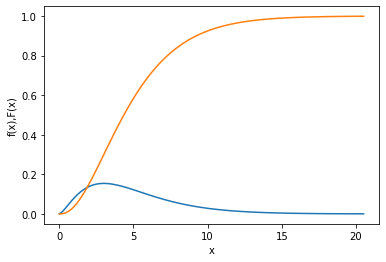

array([ 0.        ,  0.20722228,  0.41444456,  0.62166684,  0.82888912,
        1.0361114 ,  1.24333368,  1.45055596,  1.65777823,  1.86500051,
        2.07222279,  2.27944507,  2.48666735,  2.69388963,  2.90111191,
        3.10833419,  3.31555647,  3.52277875,  3.73000103,  3.93722331,
        4.14444559,  4.35166787,  4.55889014,  4.76611242,  4.9733347 ,
        5.18055698,  5.38777926,  5.59500154,  5.80222382,  6.0094461 ,
        6.21666838,  6.42389066,  6.63111294,  6.83833522,  7.0455575 ,
        7.25277978,  7.46000206,  7.66722433,  7.87444661,  8.08166889,
        8.28889117,  8.49611345,  8.70333573,  8.91055801,  9.11778029,
        9.32500257,  9.53222485,  9.73944713,  9.94666941, 10.15389169,
       10.36111397, 10.56833625, 10.77555852, 10.9827808 , 11.19000308,
       11.39722536, 11.60444764, 11.81166992, 12.0188922 , 12.22611448,
       12.43333676, 12.64055904, 12.84778132, 13.0550036 , 13.26222588,
       13.46944816, 13.67667043, 13.88389271, 14.09111499, 14.29

In [33]:
k=5
x = np.linspace(0, chi2.ppf(q = 0.999, df = k), 100)
#x= np.arange(0, chi2.ppf(q = 0.99, df = k), 1.0)
f_x = chi2.pdf(x, df = k)                            # значение функции плотности в соответствующих точках
F_x = chi2.cdf(x, df = k)                            # значение функции распределения в соответствующих точках
plt.xlabel('x')                                       # название нижней оси графика
plt.ylabel('f(x),F(x)')                                 # название верхней оси графика
plt.plot(x,f_x)                                         # график функции плотности 
plt.plot(x,F_x)                                          # график функции распределения           
plt.show();
chi2.ppf(q = 0.5, df = k)


## 2) Распределение Стьюдента

### Информация: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [6]:
k = 5                                                # число степеней свободы
t.cdf(0.7, df = k)                                   # F(0.7) = P(X <= 0.7)    - функция распределения в точке 0.7
t.pdf(0.7, df = k)                                   # f(0.7) = F'(0.7)        - функция плотности в точке 0.7
t.mean(df = k)                                       # E(X)                    - математическое ожидание X
t.var(df = k)                                        # Var(X)                  - дисперсия X
t.median(df = k)                                     # Median(X)               - медиана X
t.moment(n = 5, df = k)                              # E(X ^ 5)                - пятый (не центральный) момент X
t.ppf(q = 0.6, df = k)                               # q: P(X < q) = 0.6       - квантиль уровня 0.6 с.в. X
#t.rvs(size = 1000, df = 5)                            #                         - выборка объема 1000 из X


0.2671808657039658

## По мере увеличения числа степеней свободы распредедление Стьюдента стремится к стандартному нормальному

In [8]:
alpha = 2                                           # рассмотрим произвольную точку
# убедимся, что функции распределения обоих распредедений в этой точке очень близки                            
print(t.cdf(alpha, df = 10000) ,norm.cdf(alpha) )

0.9772363696692823 0.9772498680518208


##  График функции плотности и  функции распределения

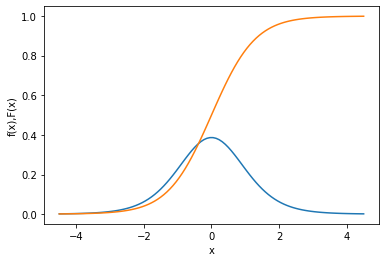

In [34]:
k=8
x = np.linspace(t.ppf(q = 0.001, df = k),            # точки, между которыми будет
                t.ppf(q = 0.999, df = k),            # строиться график
                100)                                 # количество точек (чем больше, тем больше детализация)
f_x = t.pdf(x, df = k)                               # значение функции плотности в соответствующих точках
F_x = t.cdf(x, df = k)                               # значение функции распределения в соответствующих точках
plt.xlabel('x')                                       # название нижней оси графика
plt.ylabel('f(x),F(x)')                                    # название верхней оси графика
plt.plot(x,f_x)                                         # график функции плотности 
plt.plot(x,F_x)                                          # график функции распределения           
plt.show();


## 3) Распределение Фишера

## Информация: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html¶

In [5]:
k1 = 5                                               # число степеней свободы
k2 = 10
f.cdf(0.7, dfn = k1, dfd = k2)                      # F(0.7) = P(X <= 0.7)    - функция распределения в точке 0.7
f.pdf(0.7, dfn = k1, dfd = k2)                      # f(0.7) = F'(0.7)        - функция плотности в точке 0.7
f.mean(dfn = k1, dfd = k2)                          # E(X)                    - математическое ожидание X
f.var(dfn = k1, dfd = k2)                           # Var(X)                  - дисперсия X
f.median(dfn = k1, dfd = k2)                        # Median(X)               - медиана X
f.moment(n = 3, dfn = k1, dfd = k2)                 # E(X ^ 3)                - третий (не центральный) момент X
f.ppf(q = 0.6, dfn = k1, dfd = k2)                  # q: P(X < q) = 0.6       - квантиль уровня 0.6 с.в. X
#f.rvs(size = 1000, dfn = k1, dfd = k2)              #                         - выборка объема 1000 из X

# Рассмотрим квантиль соответствующего уровня
alpha = 0.7
# Произведение соответствующих квантилей всегда
# будет равняться единице (догадайтесь почему)
f.ppf(q= 1 - alpha, dfn = k1, dfd = k2) * f.ppf(q = alpha, dfn = k2, dfd = k1)


1.0

## График функции плотности и функции распределения

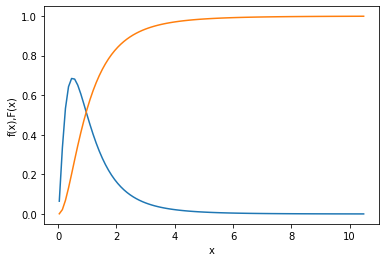

In [35]:
k1=5
k2=10
x = np.linspace(f.ppf(q = 0.001,
                      dfn = k1, dfd = k2),          # точки, между которыми будет
                f.ppf(q = 0.999,                      # строиться график
                      dfn = k1, dfd = k2),
                100)                                 # количество точек (чем больше, тем больше детализация)
f_x = f.pdf(x, dfn = k1, dfd = k2)                  # значение функции плотности в соответствующих точках
F_x = f.cdf(x, dfn = k1, dfd = k2)                  # значение функции распределения в соответствующих точках
plt.xlabel('x')                                       # название нижней оси графика
plt.ylabel('f(x),F(x)')                                    # название верхней оси графика
plt.plot(x,f_x)                                         # график функции плотности 
plt.plot(x,F_x)                                          # график функции распределения           
plt.show();

In [ ]:
# Задания
# 1. Случайная величина X имеет Хи-квадрат распредедение
#    с 10-ю степенями свободы
#    Рассчитайте:
#    1)     P(X <= 1.5)
#    2)     P(X > 1.5)
#    3)     P(1.5 <= X <= 2)
#    4)     E(X), Var(X), Median(X)
#    7)     Квантиль уровня 0.1
#    
# 2. Повторите предыдущее задание предполагая, что:
#    1)     X имеет распределение Стьюдента с 10
#           степенями свободы
#    2)     X имеет распределение Фишера с 10 и 8
#           степенями свободы